In [50]:
import pandas as pd
import numpy as np
df=pd.read_excel(r"C:\Users\LENOVO\Desktop\Data Analytics\10days challenge\Day10\players_data.xlsx")


In [51]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [52]:
df.drop(df.columns[df.columns.str.contains('^Unnamed')], axis=1, inplace=True)


In [53]:
df.head()

,Player_Name,Team,Sport,Season,Matches_Played,Runs_Goals,StrikeRate_ShotAccuracy,Wickets,Assists,Rating
0,Sam Verma,Liverpool FC,Football,2023,13,14.0,78.25,6,4,6.5
1,Leo Khan,Chennai Super Kings,Cricket,2018,14,349.0,145.58,6,3,6.8
2,Leo Brown,Manchester City,Football,2022,15,4.0,75.14,6,6,5.9
3,Vikram Singh,Delhi Capitals,Cricket,2021,15,6.5,128.33,5,3,5.8
4,Ishan Smith,Mumbai Indians,Cricket,2022,5,266.0,103.89,3,3,5.3


df.shape

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Player_Name              166 non-null    object 
 1   Team                     166 non-null    object 
 2   Sport                    166 non-null    object 
 3   Season                   166 non-null    int64  
 4   Matches_Played           166 non-null    int64  
 5   Runs_Goals               166 non-null    float64
 6   StrikeRate_ShotAccuracy  166 non-null    float64
 7   Wickets                  166 non-null    int64  
 8   Assists                  166 non-null    int64  
 9   Rating                   166 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 13.1+ KB


In [55]:
df.tail()

,Player_Name,Team,Sport,Season,Matches_Played,Runs_Goals,StrikeRate_ShotAccuracy,Wickets,Assists,Rating
161,Arjun Kapoor,Real Madrid,Football,2019,22,7.0,74.46,6,2,5.4
162,Marco Fernandes,Kolkata Knights,Cricket,2022,13,143.0,121.66,8,3,9.2
163,Rahul Miller,Liverpool FC,Football,2020,14,6.0,83.24,6,4,4.7
164,Ishan Khan,Mumbai Indians,Cricket,2024,13,468.0,144.66,7,3,7.8
165,Ethan Miller,Chennai Super Kings,Cricket,2018,11,450.0,114.94,11,3,4.9


In [56]:
df.isnull().sum()

Player_Name                0
Team                       0
Sport                      0
Season                     0
Matches_Played             0
Runs_Goals                 0
StrikeRate_ShotAccuracy    0
Wickets                    0
Assists                    0
Rating                     0
dtype: int64

In [57]:
df.describe()

,Season,Matches_Played,Runs_Goals,StrikeRate_ShotAccuracy,Wickets,Assists,Rating
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,2021.042169,13.933735,163.144578,109.131446,6.012048,3.132530,6.604819
std,2.019158,7.415083,212.788450,103.090148,1.481146,1.248234,1.545386
min,2018.000000,1.000000,0.000000,54.330000,1.000000,0.000000,0.000000
25%,2019.000000,8.000000,6.000000,72.105000,6.000000,3.000000,5.800000
50%,2021.000000,14.000000,9.500000,90.370000,6.000000,3.000000,6.600000
75%,2023.000000,19.000000,304.000000,125.290000,6.000000,3.750000,7.500000
max,2024.000000,50.000000,1200.000000,999.000000,11.000000,8.000000,11.000000


In [58]:
print(df.columns)

Index(['Player_Name', 'Team', 'Sport', 'Season', 'Matches_Played',
       'Runs_Goals', 'StrikeRate_ShotAccuracy', 'Wickets', 'Assists',
       'Rating'],
      dtype='object')


Top 5 performers each season 

In [62]:
df["Performance"]= df['Runs_Goals']*df["StrikeRate_ShotAccuracy"]


In [63]:
df['Performance'] = df['Runs_Goals'] + df['Assists']



In [64]:
# Group by season and get top 5 performers each season by 'Performance'
top_performers = df.groupby('Season').apply(lambda x: x.nlargest(5, 'Performance')).reset_index(drop=True)

print(top_performers)

        Player_Name                 Team    Sport  Season  Matches_Played  \
0       Mason Verma       Mumbai Indians  Cricket    2018               7   
1       Ishan Costa       Delhi Capitals  Cricket    2018              10   
2      Ethan Miller  Chennai Super Kings  Cricket    2018              11   
3    Vikram Johnson  Chennai Super Kings  Cricket    2018               8   
4    Luca Fernandes    Royal Challengers  Cricket    2018              11   
5      Vikram Silva    Royal Challengers  Cricket    2019               9   
6      Oliver Patel      Kolkata Knights  Cricket    2019               5   
7     Arjun Johnson       Delhi Capitals  Cricket    2019               3   
8       Rahul Rossi      Kolkata Knights  Cricket    2019              10   
9       Ethan Rossi       Delhi Capitals  Cricket    2019               3   
10      Marco Reddy       Delhi Capitals  Cricket    2020               7   
11     Aakash Reddy    Royal Challengers  Cricket    2020               9   

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13008\2629442252.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_performers = df.groupby('Season').apply(lambda x: x.nlargest(5, 'Performance')).reset_index(drop=True)


 player performance across seasons

In [67]:

df = df.sort_values(['Player_Name', 'Season'])

# Calculate performance change compared to previous season for each player
df['Performance_Change'] = df.groupby('Player_Name')['Performance'].diff()

# Define categories for performance trend by comparing change over seasons
def categorize_change(change):
    if pd.isna(change):
        return 'First Season'
    elif change > 0:
        return 'Improving'
    elif change < 0:
        return 'Declining'
    else:
        return 'Consistent'

df['Trend'] = df['Performance_Change'].apply(categorize_change)

# Optional: aggregate for summary of player trend over multiple seasons
# Example: count number of improving/declining seasons per player
summary = df.groupby('Player_Name')['Trend'].value_counts().unstack(fill_value=0)

print(df.head())
print(summary)


          Player_Name                 Team     Sport  Season  Matches_Played  \
148  Aakash Fernandes       Mumbai Indians   Cricket    2019              13   
7       Aakash Kapoor      Manchester City  Football    2018               8   
29        Aakash Khan      Manchester City  Football    2019              20   
102      Aakash Mehta  Chennai Super Kings   Cricket    2022               9   
12       Aakash Reddy    Royal Challengers   Cricket    2020               9   

     Runs_Goals  StrikeRate_ShotAccuracy  Wickets  Assists  Rating  \
148       157.0                   115.15        7        3     4.2   
7           8.0                    74.22        6        4     8.5   
29          0.0                    60.69        6        4     7.9   
102       217.0                   132.73        6        3     5.8   
12        450.0                   155.85        6        3     3.9   

     C_Performers  Performers  Performance  Performance_Change         Trend  
148      18078.55  

 player performance across seasons

In [68]:
# Step 1: Calculate total team performance per season
team_totals = df.groupby(['Season', 'Team'])['Performance'].sum().reset_index()
team_totals = team_totals.rename(columns={'Performance': 'Team_Total'})

# Step 2: Join total team performance back to df to find player contribution percentage
df = df.merge(team_totals, on=['Season', 'Team'])
df['Contribution_Pct'] = df['Performance'] / df['Team_Total']

# Step 3: Find highest player contribution per team per season (star player contribution)
star_players = df.groupby(['Season', 'Team'])['Contribution_Pct'].max().reset_index()

# Step 4: Find average player contribution per team per season (lower average = more balanced)
avg_contributions = df.groupby(['Season', 'Team'])['Contribution_Pct'].mean().reset_index()

# Step 5: Combine results for simple comparison
team_summary = star_players.merge(avg_contributions, on=['Season', 'Team'])
team_summary = team_summary.rename(columns={
    'Contribution_Pct_x': 'Top_Player_Contribution',
    'Contribution_Pct_y': 'Average_Contribution'
})

print(team_summary)

    Season                 Team  Top_Player_Contribution  Average_Contribution
0     2018        Bayern Munich                 0.555556              0.500000
1     2018  Chennai Super Kings                 0.251387              0.200000
2     2018       Delhi Capitals                 0.417431              0.333333
3     2018         FC Barcelona                 0.407407              0.333333
4     2018      Manchester City                 0.387097              0.333333
..     ...                  ...                      ...                   ...
59    2024      Kolkata Knights                 0.577674              0.333333
60    2024         Liverpool FC                 0.437500              0.333333
61    2024      Manchester City                 0.431034              0.333333
62    2024       Mumbai Indians                 0.769608              0.500000
63    2024          Real Madrid                 0.571429              0.333333

[64 rows x 4 columns]


Consistency analysis 

In [70]:
# Calculate the standard deviation of Performance per player
consistency = df.groupby('Player_Name')['Performance'].std().reset_index()

# Rename column for clarity
consistency = consistency.rename(columns={'Performance': 'Performance_StdDev'})

# Sort by lowest variation to highest (most consistent first)
consistency = consistency.sort_values('Performance_StdDev')

print(consistency)

          Player_Name  Performance_StdDev
0    Aakash Fernandes                 NaN
1       Aakash Kapoor                 NaN
2         Aakash Khan                 NaN
3        Aakash Mehta                 NaN
4        Aakash Reddy                 NaN
..                ...                 ...
161       Viraj Patel                 NaN
162       Viraj Reddy                 NaN
163       Viraj Rossi                 NaN
164       Viraj Verma                 NaN
165      Viraj Wilson                 NaN

[166 rows x 2 columns]


Advanced Insights 

In [72]:
# Step 1: Create custom performance score
df['Performance_Score'] = (0.4 * df['Runs_Goals'] +
                           0.3 * df['StrikeRate_ShotAccuracy'] +
                           0.2 * df['Assists'] +
                           0.1 * df['Rating'])

# Step 2: Identify underrated players

high_performance = df['Performance_Score'] > df['Performance_Score'].quantile(0.75)
low_rating = df['Rating'] < df['Rating'].quantile(0.25)

underrated_players = df[high_performance & low_rating]

print("Underrated Players:")
print(underrated_players[['Player_Name', 'Performance_Score', 'Rating']])

# Step 3: Find outliers 
high_strike_rate = df['StrikeRate_ShotAccuracy'] > df['StrikeRate_ShotAccuracy'].quantile(0.95)
few_matches = df['Matches_Played'] < df['Matches_Played'].quantile(0.10)

outliers = df[high_strike_rate & few_matches]

print("\nOutliers:")
print(outliers[['Player_Name', 'StrikeRate_ShotAccuracy', 'Matches_Played']])

Underrated Players:
         Player_Name  Performance_Score  Rating
4       Aakash Reddy            227.745     3.9
8        Arjun Costa            167.037     5.2
9      Arjun Johnson            194.124     5.4
35      Ethan Miller            215.572     4.9
36       Ethan Patel            172.351     5.4
41       Ishan Joshi            230.423     5.3
50       Ishan Verma            169.239     5.2
74    Luca Fernandes            201.687     4.8
94       Mason Gupta            171.729     5.4
95      Mason Kapoor            217.923     5.7
102     Noah Johnson            192.555     5.2
121  Rahul Fernandes            180.889     5.3
128      Rahul Rossi            177.996     5.0

Outliers:
      Player_Name  StrikeRate_ShotAccuracy  Matches_Played
149  Vikram Gupta                    210.0               3
159  Viraj Kapoor                    999.0               2
164   Viraj Verma                    999.0               2


In [81]:
Q1 = df['StrikeRate_ShotAccuracy'].quantile(0.25)
Q3 = df['StrikeRate_ShotAccuracy'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[
    (df['StrikeRate_ShotAccuracy'] < Q1 - 1.5*IQR) | 
    (df['StrikeRate_ShotAccuracy'] > Q3 + 1.5*IQR)
]

print(outliers[['Player_Name', 'StrikeRate_ShotAccuracy', 'Matches_Played']])

      Player_Name  StrikeRate_ShotAccuracy  Matches_Played
149  Vikram Gupta                    210.0               3
159  Viraj Kapoor                    999.0               2
164   Viraj Verma                    999.0               2


Visualization

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13008\1926824094.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="viridis")


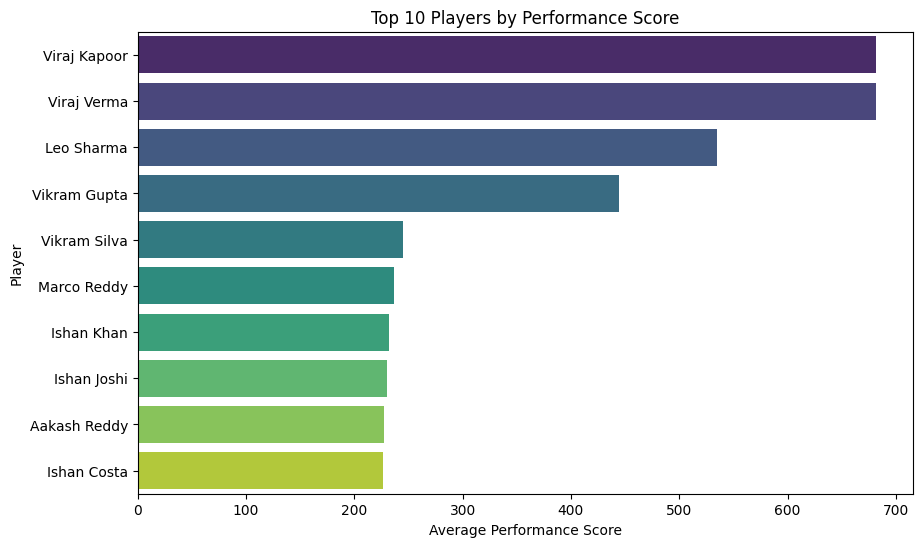

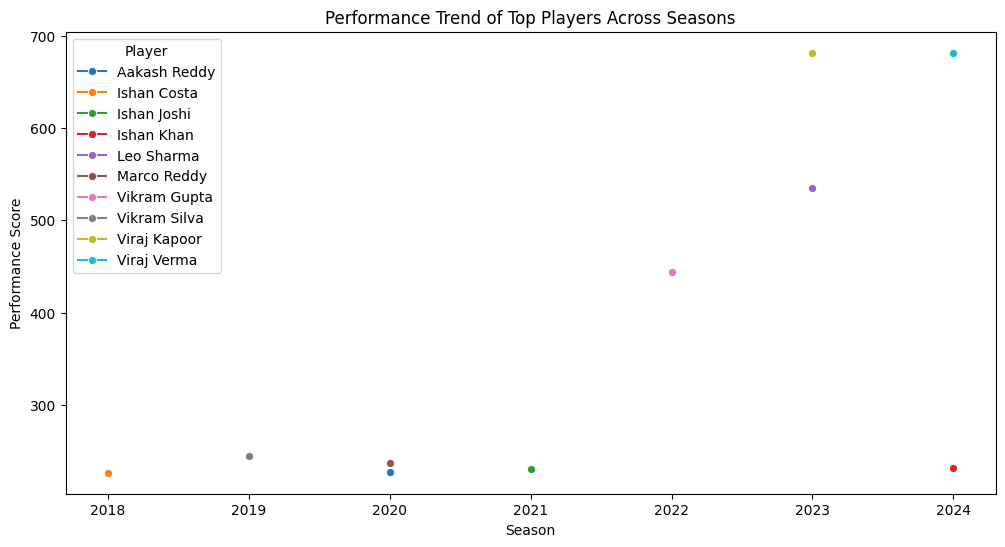

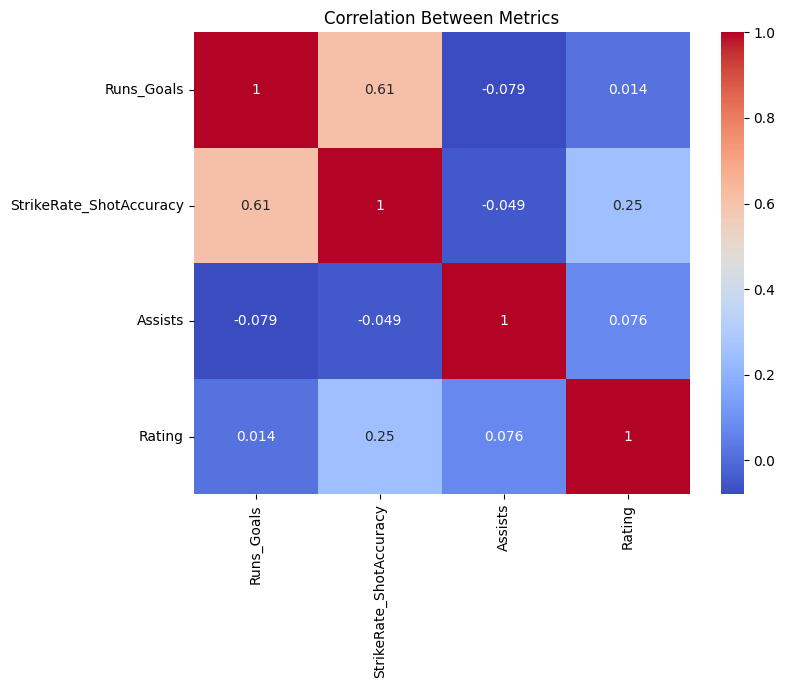

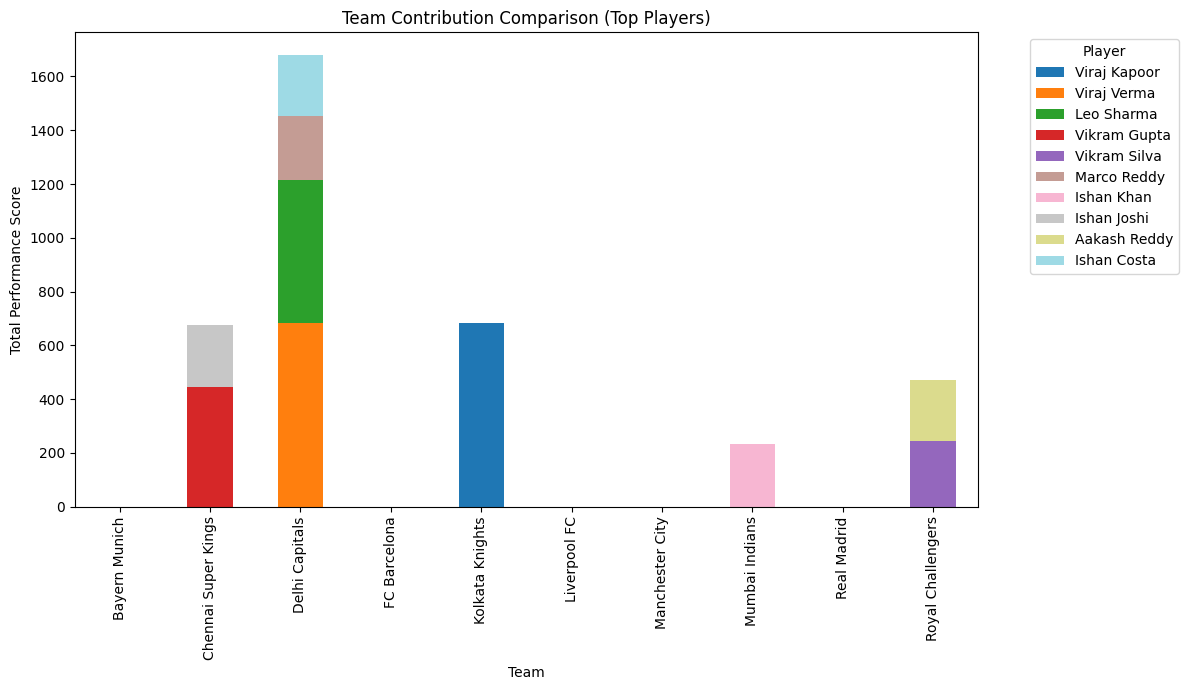

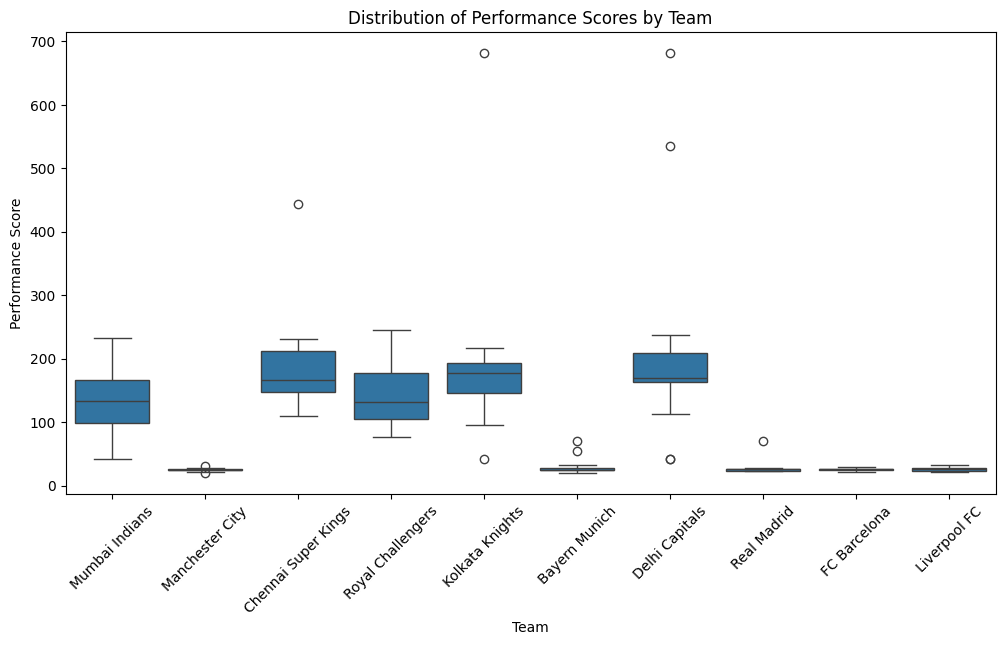

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 

# Bar Chart → Top 10 players by performance score
top10 = df.groupby('Player_Name')['Performance_Score'].mean().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")
plt.title('Top 10 Players by Performance Score')
plt.xlabel('Average Performance Score')
plt.ylabel('Player')
plt.show()


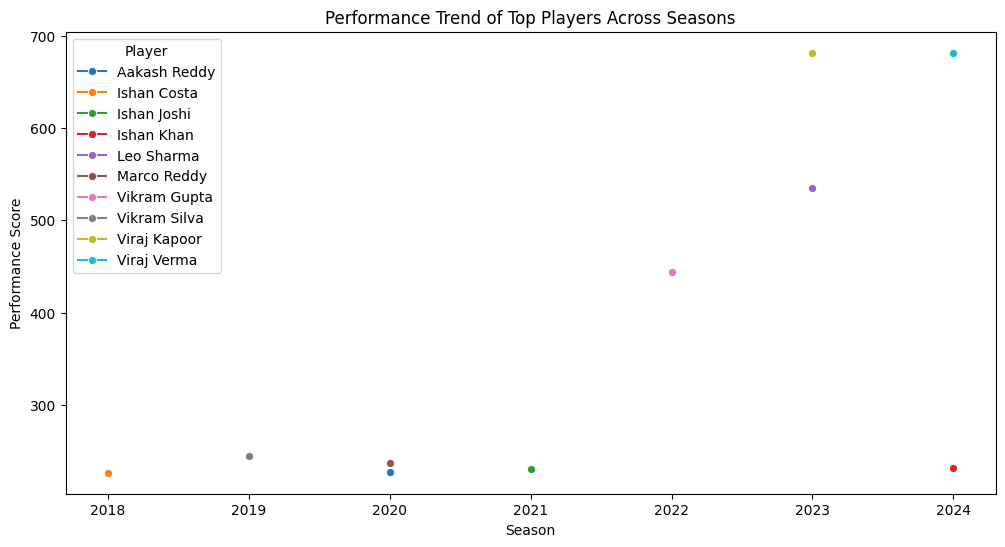

In [88]:
# Line Chart - Trend of top players across seasons
top_players = top10.index.tolist()
trend_df = df[df['Player_Name'].isin(top_players)]
plt.figure(figsize=(12,6))
sns.lineplot(data=trend_df, x='Season', y='Performance_Score', hue='Player_Name', marker="o")
plt.title('Performance Trend of Top Players Across Seasons')
plt.xlabel('Season')
plt.ylabel('Performance Score')
plt.legend(title='Player')
plt.show()

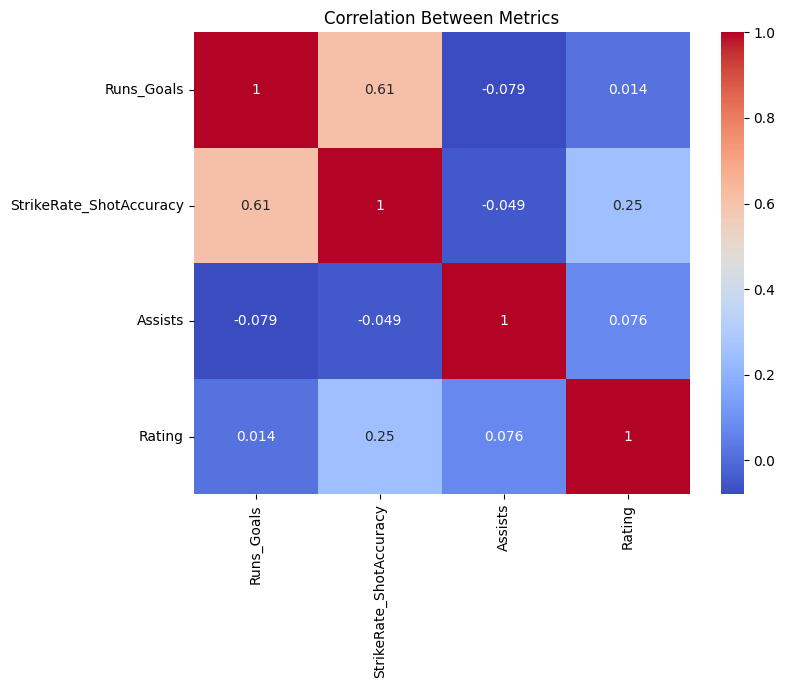

In [89]:
# Heatmap - Correlation between metrics
metrics = ['Runs_Goals', 'StrikeRate_ShotAccuracy', 'Assists', 'Rating']
plt.figure(figsize=(8,6))
corr = df[metrics].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Metrics')
plt.show()

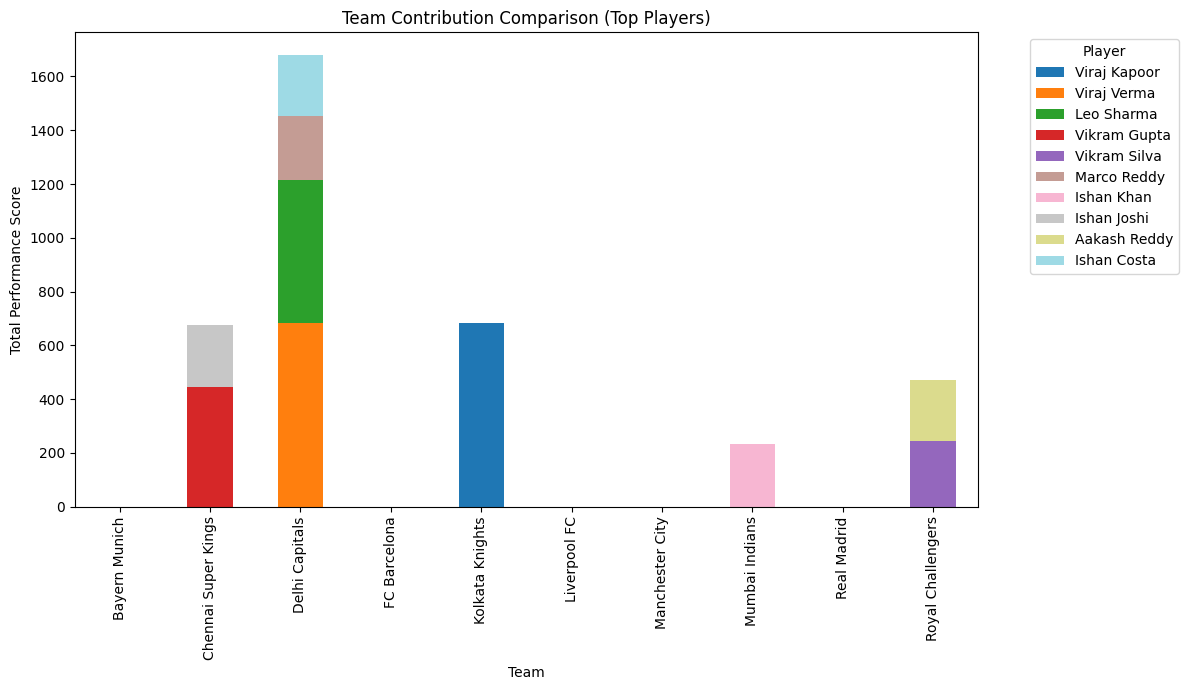

In [90]:
#Stacked Bar Chart - Team contribution comparison (sum of Performance_Score per player per team)
team_contrib = df.groupby(['Team', 'Player_Name'])['Performance_Score'].sum().unstack(fill_value=0)
team_contrib_top_players = team_contrib.loc[:, top10.index]  # focus on top players only for clarity
team_contrib_top_players.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')
plt.title('Team Contribution Comparison (Top Players)')
plt.ylabel('Total Performance Score')
plt.xlabel('Team')
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

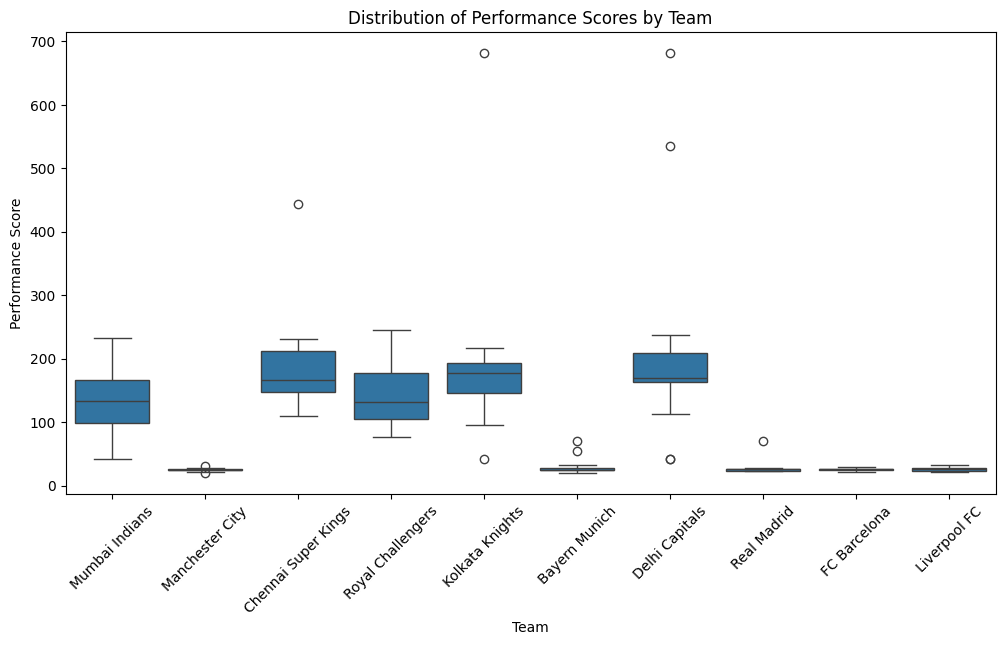

In [91]:
# Boxplot - Distribution of performance scores by team
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Team', y='Performance_Score')
plt.title('Distribution of Performance Scores by Team')
plt.xlabel('Team')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)
plt.show()